## Dodgers promotion night predictive analysis

For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:
Box plots, Scatter plots, Regression Model


In [25]:
# Load the packages
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import __version__ as mpv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import __version__ as sklv
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
#$$
print('Using version %s of pandas' % pd.__version__)
print('Using version %s of pandas_profiling' % pp.__version__)
print('Using version %s of matplotlib' % mpv)
print('Using version %s of seaborn' % sns.__version__)
print('Using version %s of sklearn' % sklv)
print('Using version %s of numpy' % np.__version__)

Using version 1.1.1 of pandas
Using version 2.9.0 of pandas_profiling
Using version 3.3.1 of matplotlib
Using version 0.11.0 of seaborn
Using version 0.23.2 of sklearn
Using version 1.18.5 of numpy


In [26]:
# Load data into a dataframe
addr = "./dodgers.csv"
data = pd.read_csv(addr)

In [27]:
data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [28]:
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
       month day_of_week opponent   skies day_night cap shirt fireworks  \
count     81          81       81      81        81  81    81        81   
unique     7           7       17       2         2   2     2         2   
top      MAY    Saturday   Giants  Clear      Night  NO    NO        NO   
freq      18          13        9      62        66  79    78        67   

       bobblehead  
count          81  
unique          2  
top            NO  
freq           70  


## Feature Selection

We can clearly remove some of the feature
for the promotions 'shirt','cap' there are not enough data where a shit or cap was provided
'opponent','day','temp','skies' are not related to answering the question we have at hand -
so we are removing these features.

In [29]:
columns1 = ['shirt','cap','opponent','day','temp','skies','day_night']
data1 = data.drop(columns1,axis=1)
#data.drop(columns1,axis=1,inplace= True)

#new_feature_train = features_train.drop(to_drop,axis=1)

In [30]:
data1.head()

,month,attend,day_of_week,fireworks,bobblehead
0,APR,56000,Tuesday,NO,NO
1,APR,29729,Wednesday,NO,NO
2,APR,28328,Thursday,NO,NO
3,APR,31601,Friday,YES,NO
4,APR,46549,Saturday,NO,NO


### One Hot Encoding

#### To convert categorical features into numerical values.

In [31]:
encoded_data = data1
encoded_data.head()

,month,attend,day_of_week,fireworks,bobblehead
0,APR,56000,Tuesday,NO,NO
1,APR,29729,Wednesday,NO,NO
2,APR,28328,Thursday,NO,NO
3,APR,31601,Friday,YES,NO
4,APR,46549,Saturday,NO,NO


In [32]:
def encode_and_bind(original_dataframe, feature_to_encode):
    # generate binary values using get_dummies
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    #concating the encoded columns
    res = pd.concat([original_dataframe, dummies], axis=1)
    #dropping the original column
    res = res.drop([feature_to_encode], axis=1)
    return(res)


#encode_and_bind(data, 'month')

# passing the list of categorical column to be encoded
features_to_encode = ['month', 'day_of_week', 'fireworks','bobblehead']
# looping the function for each categorical column
for feature in features_to_encode:
    res2 = encode_and_bind(encoded_data, feature)
    encoded_data = res2

In [33]:
encoded_data.head()

,attend,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,56000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,29729,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,28328,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,31601,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,46549,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [34]:
print("Summarized Encoded Data")
print(encoded_data.describe())


Summarized Encoded Data
             attend  month_APR  month_AUG  month_JUL  month_JUN  month_MAY  \
count     81.000000  81.000000  81.000000  81.000000  81.000000  81.000000   
mean   41040.074074   0.148148   0.185185   0.148148   0.111111   0.222222   
std     8297.539460   0.357460   0.390868   0.357460   0.316228   0.418330   
min    24312.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%    34493.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%    40284.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%    46588.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max    56000.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

       month_OCT  month_SEP  day_of_week_Friday  day_of_week_Monday  \
count  81.000000  81.000000           81.000000           81.000000   
mean    0.037037   0.148148            0.160494            0.148148   
std     0.190029   0.357460            0.369350            0

## Creating Feature and labels (target)
## Splitting data into train and test

In [35]:
features = encoded_data.drop('attend', axis=1)
target = encoded_data['attend']

#make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.80, random_state=42)

## Dimensionality and Feature Reduction

### Correlation of features

<AxesSubplot:title={'center':'Pearson Ranking of 18 Features'}>

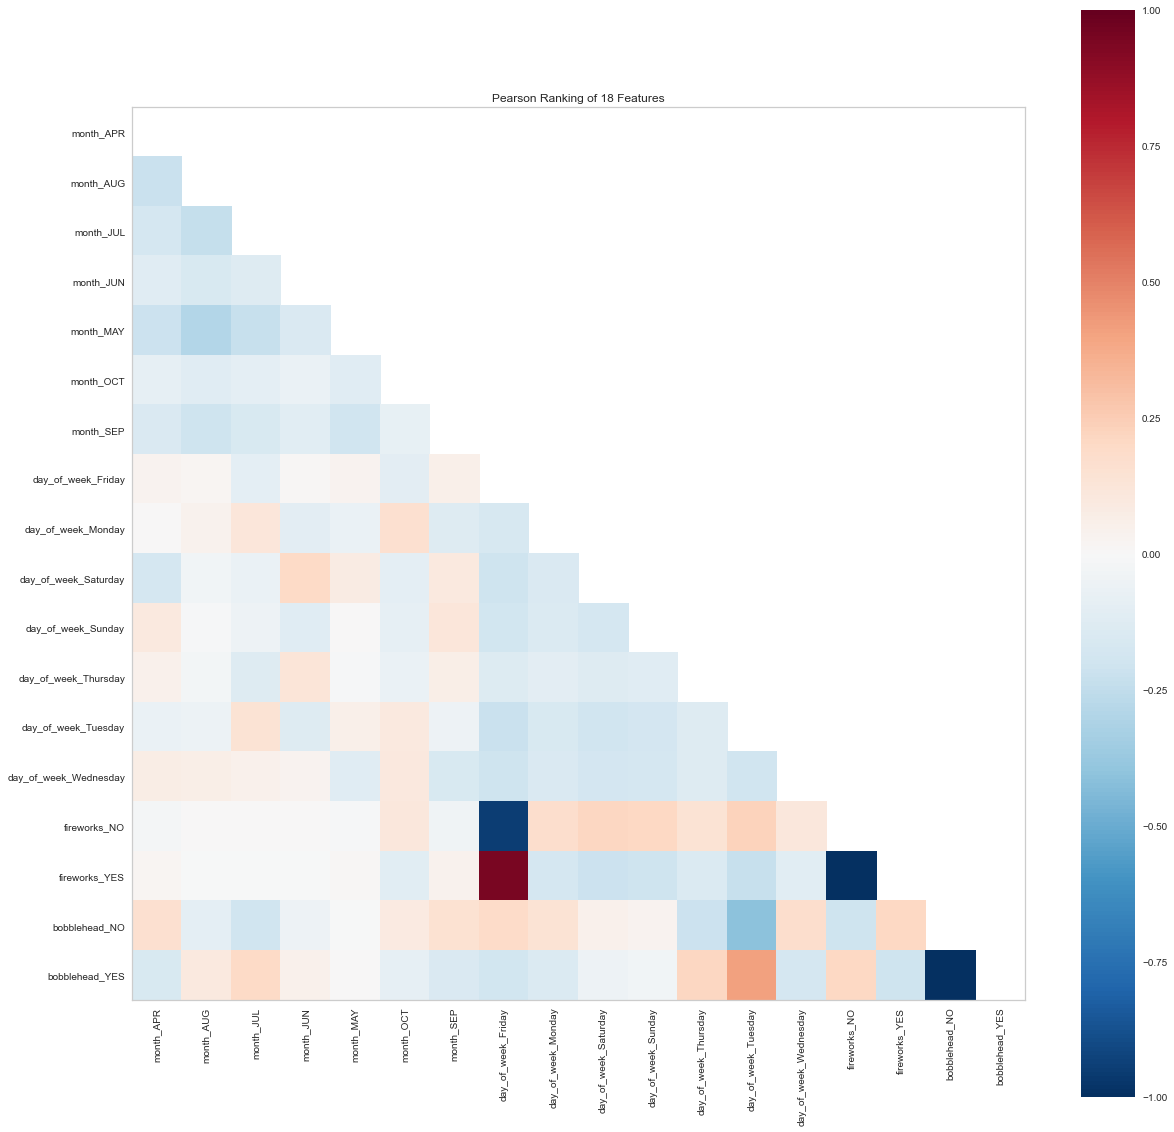

In [36]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = features_train

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features_train.columns, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="./pcovfeaturetrain1.png") # Draw/show/poof the data
#plt.show()

Looking at the pearson covariance chart we can see that there are some features with very high corelation.
The information they contain is very similar.

we have seen earlier that below features are highly correlated and the one hot encoding have created these from categorical data.
There contain redundant information and one from each of this group can be removed.

fireworks_NO  & fireworks_YES

bobblehead_NO & bobblehead_YES

In [37]:
features_train.corr()

,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
month_APR,1.000000,-0.223814,-0.174078,-0.117760,-0.214052,-0.089709,-0.152894,0.035986,0.002250,-0.174078,0.094949,0.049721,-0.065153,0.073499,-0.019201,0.019201,0.163636,-0.163636
month_AUG,-0.223814,1.000000,-0.238095,-0.161067,-0.292770,-0.122700,-0.209121,0.017719,0.042472,-0.034921,-0.011605,-0.023623,-0.056523,0.066667,0.004298,-0.004298,-0.094499,0.094499
month_JUL,-0.174078,-0.238095,1.000000,-0.125274,-0.227710,-0.095433,-0.162650,-0.096471,0.124952,-0.066667,-0.050289,-0.125274,0.146145,0.051852,0.003343,-0.003343,-0.197288,0.197288
month_JUN,-0.117760,-0.161067,-0.125274,1.000000,-0.154042,-0.064559,-0.110030,0.009323,-0.102017,0.195428,-0.117760,0.132203,-0.132623,0.035077,0.002261,-0.002261,-0.049721,0.049721
month_MAY,-0.214052,-0.292770,-0.227710,-0.154042,1.000000,-0.117348,-0.200000,0.036314,-0.064334,0.084578,0.003398,-0.013204,0.059484,-0.123614,-0.014679,0.014679,-0.003398,0.003398
month_OCT,-0.089709,-0.122700,-0.095433,-0.064559,-0.117348,1.000000,-0.083820,-0.106533,0.159132,-0.095433,-0.089709,-0.064559,0.094908,0.108157,0.111965,-0.111965,0.089709,-0.089709
month_SEP,-0.152894,-0.209121,-0.162650,-0.110030,-0.200000,-0.083820,1.000000,0.060523,-0.132453,0.097590,0.118918,0.066018,-0.046961,-0.162650,-0.044037,0.044037,0.152894,-0.152894
day_of_week_Friday,0.035986,0.017719,-0.096471,0.009323,0.036314,-0.106533,0.060523,1.000000,-0.168345,-0.206725,-0.194325,-0.139845,-0.218850,-0.206725,-0.951486,0.951486,0.194325,-0.194325
day_of_week_Monday,0.002250,0.042472,0.124952,-0.102017,-0.064334,0.159132,-0.132453,-0.168345,1.000000,-0.150805,-0.141759,-0.102017,-0.159650,-0.150805,0.176929,-0.176929,0.141759,-0.141759
day_of_week_Saturday,-0.174078,-0.034921,-0.066667,0.195428,0.084578,-0.095433,0.097590,-0.206725,-0.150805,1.000000,-0.174078,-0.125274,-0.196048,-0.185185,0.217265,-0.217265,0.050289,-0.050289


In [38]:
# Create correlation matrix
corr_matrix = features_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                          k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.99
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

# Drop features
#features_train.drop(features_train.columns[to_drop], axis=1)
    #.head(3)
new_feature_train = features_train.drop(to_drop,axis=1)

In [39]:
print("Summarized Encoded Data")
print(new_feature_train.describe())

Summarized Encoded Data
       month_APR  month_AUG  month_JUL  month_JUN  month_MAY  month_OCT  \
count  64.000000  64.000000  64.000000  64.000000  64.000000  64.000000   
mean    0.140625   0.234375   0.156250   0.078125   0.218750   0.046875   
std     0.350382   0.426956   0.365963   0.270490   0.416667   0.213042   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

       month_SEP  day_of_week_Friday  day_of_week_Monday  \
count  64.000000           64.000000           64.000000   
mean    0.125000            0.187500            0.109375   
std     0.333333            0.393398            0.314576   
min     0.000000            0.000000            0.000000   


Features have been removed and we now only have 16 columns

In [40]:
new_feature_train1 = new_feature_train
new_feature_train1.head()

,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,fireworks_NO,bobblehead_NO
61,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
55,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
64,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Linear Regression

In [41]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(new_feature_train1,target_train)
#print(list(zip(model1.coef_ , t_features)))

# Storing the coef, feature combo in a dic
coef_dict = {}
for coef, feat in zip(model1.coef_,new_feature_train1):
    coef_dict[feat] = coef

In [42]:
coef_dict


{'month_APR': -3377.9755009555493,
 'month_AUG': 1758.353184116948,
 'month_JUL': 1647.1704087264561,
 'month_JUN': 5461.133773685064,
 'month_MAY': -3324.4324543454736,
 'month_OCT': -214.08693220628265,
 'month_SEP': -1950.1624790211692,
 'day_of_week_Friday': -11945.516456752177,
 'day_of_week_Monday': -2793.453811474091,
 'day_of_week_Saturday': 4037.825904560038,
 'day_of_week_Sunday': 6107.300640728422,
 'day_of_week_Thursday': -119.88900709558834,
 'day_of_week_Tuesday': 5514.270394530945,
 'day_of_week_Wednesday': -800.5376644975887,
 'fireworks_NO': -16445.706629751254,
 'bobblehead_NO': -11340.61269094941}

Based on the coef values we can see that

The best month for promotion to increase the attendance is JUN.
and the best day for promotion to increase the attendance is Sunday followed by Tuesday
and the best promotion would be fireworks followed by bobblehead
### So the best way to increase the attendance is by promotion of fireworks on a Sunday in June


